# Convolutional Neural Network

The way computers process images is the same that we do.

Step 1: Convolution:

Find features in your image using a feature detector, and putting it into a feature map. These features the computer uses could sometimes not mean anything to humans, but they work.

A combined integration of two functions (Google it for the equation).

Feature detector: Usually 3x3, 7x7 and 5x5 are popular too. Maybe play with this to see which is more accurate for your model? Also called filter or kernel. Made to resize input image. You are losing some information, but the purpose of this is to detect parts of the image that are integral.

Feature map = Input image * Feature detector. You put the feature 3x3 feature detector in the top left 3x3 pixels of the input image, and multiply each value at each position. Then, add up results and place in the relative feature map position.
  
  We create multiple feature maps and the network decides through its training which features are important and looks for them, so we will have different filters/feature detector. Many feature maps form the first convolution layer. Decides which feature map is most appropriate for a category.

  It is like a filter just like the sharpen one, but filters the image to show the key features.

Stride: Amount of pixels to move by when creating feature map. Stride = 2 is the convention. The larger the stride, the smaller the feature map. You want the image smaller so that it is easier to process.

Step 1(B): ReLU Layer:

After the convolutional layer(s), apply a rectifier function.

We apply rectifier because we want to decrease linearity in our CNN. We want to do this because images themselves are highly non-linear.

When using convolution and feature detection, we risk creating something linear.

After convolutional layer, we have image in black gray and white. Rectifier function removes all the black (because anything below 0 it turns into 0)

It looks like when you go from white to grey, next step is black. Its a linear progression from bright to dark, like a linear relationship. We are breaking up this relationship.

Step 2: Pooling:

Want the neural network to recognize the cheetah in different images and orientations, different parts of image, looking in different directions, lighting is different, etc.

Max pooling, mean pooling etc. Different types.

Max pooling: Take a box of 2x2 size (could be any size) and place in top left corner. Keep the maximum value in this box. This has a stride too.
From this pooling, we are getting rid of 75% of the stuff that we are not looking for, and because we are taking the maximum, we are accounting for any distortion. If the cheetah's face is on different parts of the image, we will still get the same pooled feature map.

Benefits: Preserving the features, introducing spatial invariance, reducing the size by 75% to help with processing and reducing the number of parameters (avoiding overfitting especially because we're removing unnecessary information)

Step 3: Flattening:

Turn a matrix into a 1D matrix (one column), which is one large vector of inputs for the artificial neural network.

Step 4: Full Connection:

Adding a whole new ANN to the back of the ANN we just made.

The flattening occurs, then its the inputs of this new ANN.

This input layer connects to the fully connected layer, which connects to the output layer.


We already have features encoded in these input values, and they could probably already do a good job, but at the same time we know that we have this ANN structure which has a purpose of dealing with features and coming up with new attributes and combining attributes together to predict things we are trying to predict. We are letting it even further optimize the results.

### Importing the libraries

## Part 1 - Data Preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.16.1'

### Preprocessing the Training set

In [3]:
# Want to apply transformation on training set to avoid overfitting.
# Simple geometrical transformations (transvections to shift pixels, flips, rotations, zoom in or out). This is called image augmentation. Changing images of training set so that it is not overtrained. We are augmenting the diversity of the training set images.

train_datagen = ImageDataGenerator( # We use this transformations because this is what Keras did in their example.
        rescale=1./255, # This will apply feature scaling to each pixel by dividing their value by 255. We get all values between 0 and 1 (like normalization).
        shear_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True)

# Train this object to our training images
training_set = train_datagen.flow_from_directory( # Import training set from our directory
        '/Users/tomassalian/Desktop/Developer/Webcam Emotion Detector/FER-2013 Facial Expression Images/train', # Path leading to training set
        target_size=(64, 64), # Final size of image when fed into the convolutional neural network.
        batch_size=32, # How many images in each batch.
        class_mode='categorical',
        shuffle=True) # Binary or categorical. Since we only have class or dog, we do class mode = binary

Found 28709 images belonging to 7 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
       '/Users/tomassalian/Desktop/Developer/Webcam Emotion Detector/FER-2013 Facial Expression Images/test',
        target_size=(64, 64),
       batch_size=32,
       class_mode='categorical')

Found 7178 images belonging to 7 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
# A CNN is a sequence of layers
from tensorflow.keras.models import Sequential

cnn = Sequential() # Allows to create an ANN as a sequence of layers

### Step 1 - Convolution

In [6]:
# Conv2D class allows to build a fully connected layer from layers module in Keras library.
# Filters is the number of feature detectors you want to apply to your image.
# Size of the feature detectors (Rows and columns).
# We prefer ReLU activation function if we haven't reached output layer.
# Working with 3D images (RGB colors). So end of input_shape is a 3. For black and white, it's 1. input_shape only necessary for first convolutional layer in order to automatically connect this first layer to the input layer
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D

cnn.add(Input(shape=(64, 64, 3)))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu')) # Adding our first convolutional layer


### Step 2 - Pooling

In [7]:
# Add pooling layer to our convolutional layer

cnn.add(MaxPool2D(pool_size=2, strides=2)) # Adding our first pooling layer

### Adding a second convolutional layer

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
from tensorflow.keras.layers import Flatten

cnn.add(Flatten())

### Step 4 - Full Connection

In [10]:
# Units is the number of hidden neurons
# Activation ReLU because still did not reach output layer
from tensorflow.keras.layers import Dense

cnn.add(Dense(units=1024, activation='relu')) # Adding the first fully connected layer

# Adding a second layer doesnt do much

### Step 5 - Output Layer

In [11]:
# If it was not binary classification, if it was multiclass it would be softmax.
cnn.add(Dense(units=7, activation='softmax')) # Adding the output layer.

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,450,983 (24.61 MB)

 Trainable params: 6,450,983 (24.61 MB)

 Non-trainable params: 0 (0.00 B)

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
# Optimizer: Specifies method used to adjust the weights of the network during training. Optimizers minimize the loss function, which is a measure of how well the model is performing. The optimizer updates the model in response to the output of the loss function.
#   Adam (Adaptive Moment Estimation): One of the most effective optimization algorithms
# Loss Function: This defines the measure of error for the model during training. The loss function evaluates how well the model makes predictions compared to the actual labels.
#   Categorical Crossentropy: This is a loss function that is used in categorical classification
# Metrics: These are used to monitor the training and testing steps. Unlike the loss function, metrics are used for evaluation and interpretation but not for training model itself.
#    For binary classification, it calculates the percentage of correctly predicted labels
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # Compiling the CNN


In [14]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Class distribution
classes = np.array([0]*3996 + [1]*437 + [2]*4098 + [3]*7216 + [4]*4831 + [5]*3172 + [6]*4966)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes)

class_weight_dict = dict(enumerate(class_weights))
print("Class Weights: ", class_weight_dict)


Class Weights:  {0: 1.0265980265980266, 1: 9.387381497221314, 2: 1.00104580631667, 3: 0.5684985745961356, 4: 0.8491587071591211, 5: 1.2932804900018016, 6: 0.8260744491110983}


### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=100,
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

# Current best stats: 1024 units, simple randomization, 0.001 learning rate, first convolutional layer = 64 filters, second convolutional layer = 32 filters
#                     Relu after each Conv2D, batch size = 32 (about 8-10s longer per epoch but 3% more accurate at epoch 5)
# Current best accuracy with this, ~0.51 at Epoch 5/20 and 0.8942 at Epoch 100/100


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 63ms/step - accuracy: 0.1765 - loss: 1.9672 - val_accuracy: 0.2722 - val_loss: 1.8143
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.2751 - loss: 1.8394 - val_accuracy: 0.3543 - val_loss: 1.6474
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.3390 - loss: 1.7271 - val_accuracy: 0.3826 - val_loss: 1.5713
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 62s 68ms/step - accuracy: 0.3806 - loss: 1.6269 - val_accuracy: 0.4164 - val_loss: 1.5313
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 62s 69ms/step - accuracy: 0.4200 - loss: 1.5287 - val_accuracy: 0.4412 - val_loss: 1.4550
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 62s 69ms/step - accuracy: 0.4518 - loss: 1.4721 - val_accuracy: 0.4575 - val_loss: 1.4261
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 63s 70ms/step - accuracy: 0.4747 - loss: 1.3930 - val_accuracy: 0.4798 - val_loss: 1.3759
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 63s 70ms/step - accuracy: 0.4943 - loss: 1.3484 - val_

NameError: name 'history' is not defined

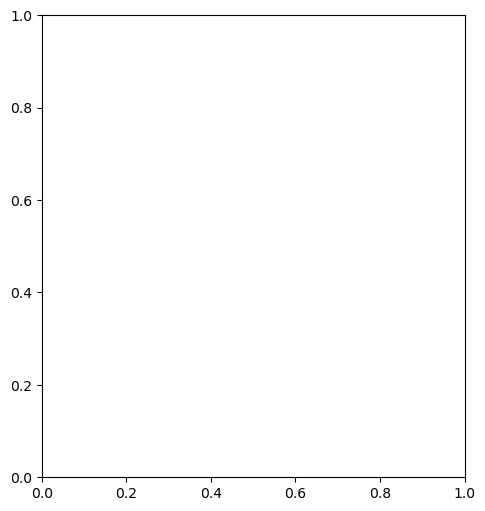

In [16]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(cnn.history['accuracy'])  # Replace 'accuracy' with 'acc' if using an older version of Keras
plt.plot(cnn.history['val_accuracy'])  # Replace 'val_accuracy' with 'val_acc' if using an older version of Keras
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
cnn.save('70_emotion_model.keras')

## Part 4 - Making a single prediction

In [20]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/tomassalian/Desktop/Developer/Webcam Emotion Detector/Kanye Test Subject.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image) # Convert pil format (format of images) into a NumPy array because predict method expects a 2D array
# Because we made the batch 32, this image needs to be a part of a batch
test_image = test_image/255.0
test_image = np.expand_dims(test_image, axis = 0) # We add to it an extra dimension, correponding to a batch. The dimension of the batch is always the first dimension because you give first the batch of images and then inside each batch, you have the images.
                                                  # Parameter to specify this is axis = 0, so the dimension we are adding is the first dimension
# Predict the emotions
predictions = cnn.predict(test_image)

# Ensure predictions are squeezed to eliminate batch dimension if it exists
predictions = np.squeeze(predictions)

# Check the shape of predictions
print("Shape of predictions:", predictions.shape)

# Get indices of the sorted probabilities (in descending order)
sorted_indices = np.argsort(predictions)[::-1]

# Define your class indices
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Print predictions and their corresponding emotions for debugging
print("Predictions:", predictions)
print("Sorted indices:", sorted_indices)

# Retrieve and print top three emotions based on the indices
if len(predictions) >= 3:
    top_three_emotions = [emotions[index] for index in sorted_indices[:3]]
    print("Most likely emotion:", top_three_emotions[0])
    print("Second most likely emotion:", top_three_emotions[1])
    print("Third most likely emotion:", top_three_emotions[2])
else:
    print("Not enough data to determine top three emotions.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Shape of predictions: (7,)
Predictions: [0.09919152 0.00314103 0.13556992 0.17587022 0.16333355 0.3502152
 0.07267857]
Sorted indices: [5 3 4 2 0 6 1]
Most likely emotion: Surprise
Second most likely emotion: Happy
Third most likely emotion: Sad


Found 7178 images belonging to 7 classes.
  81/7178 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step

/var/folders/xk/bm586yz91nn5_jsf3_csn7f80000gn/T/ipykernel_22805/646084184.py:27: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7178/7178 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
Confusion matrix, without normalization


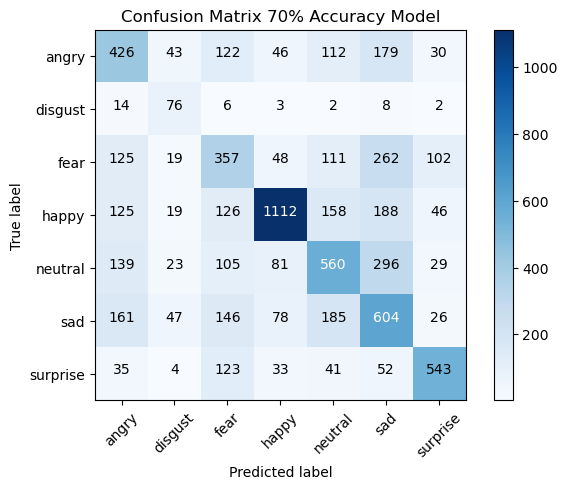

In [10]:
from sklearn.metrics import confusion_matrix
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Assuming you have a directory with organized test data
test_data_dir = '/Users/tomassalian/Desktop/Developer/Webcam Emotion Detector/FER-2013 Facial Expression Images/test'  # Update this path

# Load the model
model = load_model('/Users/tomassalian/Desktop/Developer/Webcam Emotion Detector/Executable Files/Models/70_emotion_model.keras')  # Update this path

# Prepare the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),  # or the input size of your model
    color_mode='rgb',
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

# Predict the test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix 70% Accuracy Model',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plot_confusion_matrix(cm, class_labels)

plt.show()


In [ ]:
training_set.classes
test_set.classes